In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv(r'Parkinsons Train Data.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1040, 28)
['Subject Id', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'Class information']


In [3]:
data.head()

,Subject Id,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,Class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1


In [4]:
features = data.loc[:, data.columns != 'Class information'].values[:, 1:]
labels = data.loc[:, 'Class information'].values

In [5]:
labels[labels == 1].shape[0], labels[labels == 0].shape[0]

(520, 520)

In [7]:
cols_full = ['Jitter(local)', 'Jitter(local, absolute)',
       'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)',
       'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM',
       'Median Pitch', 'Mean Pitch', 'Standard deviation',
       'Minimum pitch', 'Maximum pitch', 'Number of pulses',
       'Number of periods', 'Mean period', 'Standard deviation of period',
       'Fraction of locally unvoiced frames', 'Number of voice breaks',
       'Degree of voice breaks']
X = data[cols_full]

In [8]:
y = data['Class information']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66, test_size= 0.05, stratify=data['Class information'])

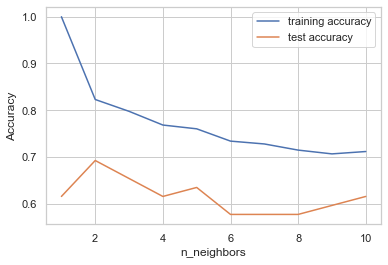

In [42]:
def getkNNGraph(a, b):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66, test_size= 0.05, stratify=data['Class information'])
    from sklearn.neighbors import KNeighborsClassifier

    training_accuracy = []
    test_accuracy = []
    # try n_neighbors from 1 to 10
    neighbors_settings = range(a, b)

    for n_neighbors in neighbors_settings:
        # build the model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(knn.score(X_train, y_train))
        # record test set accuracy
        test_accuracy.append(knn.score(X_test, y_test))

    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    plt.savefig('knn_compare_model')
    
getkNNGraph(1, 11)

In [39]:
def getkNN(): 
    knn = KNeighborsClassifier(n_neighbors=20)
    knn.fit(X_train, y_train)

    print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    
getkNN()

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.62


In [40]:
cols_1 = ['Jitter(local)','Shimmer (local)','AC', 'NDH', 'HTM',
       'Median Pitch', 'Mean Pitch', 'Standard deviation',
       'Minimum pitch', 'Maximum pitch', 'Number of pulses',
       'Number of periods', 'Mean period', 'Standard deviation of period',
       'Fraction of locally unvoiced frames', 'Number of voice breaks',
       'Degree of voice breaks']
X = data[cols_1]

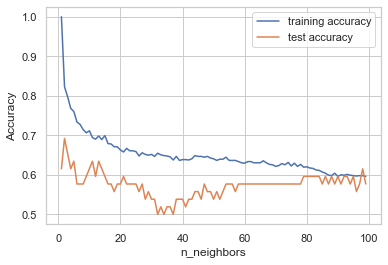

In [44]:
getkNNGraph(1, 100)